First, I simulate butterfly spectrum in two dimensional square lattice here. Notice that towards $N^2$ lattice site, the Hamiltion written as $H=-t\sum_{ij}a^{+}_{i+1,j}a_{i,j} + e^{i2\pi\alpha i}a^{+}_{i,j+1}a_{i,j}+h.c.$. In the real caculation of the energy spectrum, the Hamiltion should be written as a $N^2\otimes N^2$ matrice and solve the eigenvalue directly in the real space.

In [192]:
import numpy as np
from scipy.optimize import fsolve

# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 7.5*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7.5*2.54,
    'lines.linewidth':2,
    'axes.linewidth': 1.0,  # default 1.25
    'legend.fontsize': 6*2.54,
    'xtick.labelsize': 7.5*2.54,
    'ytick.labelsize': 7.5*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In [225]:
def H(alpha,N,t=1):
    H = np.zeros((N**2,N**2),dtype=complex)
    # hopping along x direction without phase
    Hx1 = np.diag(np.ones(N-1),1)*t
    Hx2 = np.diag(np.ones(N-1),-1)*t
    Hx1[n-1][0] = t
    Hx2[0][n-1] = t
    H += np.kron(Hx1+Hx2,np.eye(N))
    # hopping along y direction with site-dependent phase
    Hy = np.diag(np.exp(1j*alpha*2*np.pi*np.arange(N)),0)*t
    H += np.kron(Hy,Hx1) + np.kron(Hy.conj().T,Hx2)
    return H

Text(0, 0.5, 'Energy')

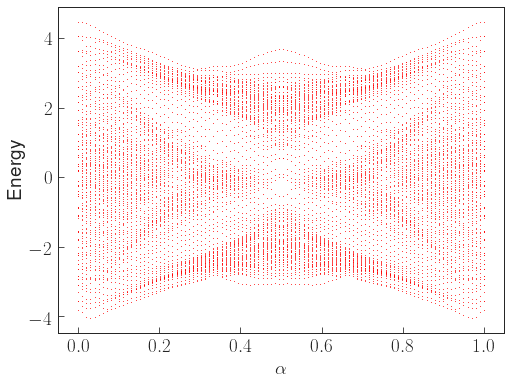

In [227]:
alpha = np.linspace(0,1,100)
N=10
for a in alpha:
    E=np.linalg.eigvalsh(H(a,N))
    for e in E:
        plt.scatter(a,e,c='r',s=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Energy')

After we determine the properity in real space, next step we solve the spectrum in momentumn space. We should pay attention here: we can still assume plane wave approximation in the y direction for hopping term is only depend on x directon sites. We can write the same harper equaition with $a^{+}_{m,n}=\psi_n e^{i(k_x m+k_y n)}$:

$-2 t \cos \left(k_{x}+2 \pi \alpha n\right) \psi_{n}-t\left(e^{-i k_{y}} \psi_{n-1}+e^{i k_{y}} \psi_{n+1}\right)=E_{k_{x}, k_{y}} \psi_{n}$

Then if $\alpha=\frac{p}{q}$, where $p,q$ are integer.

In [110]:
def Hk(kx,ky,p,q,t=1):
    # based on the knowledge we get above, the Hamiltion in k-space will be divided into q band and we can write the q*q matrice,
    # the input kx in [-pi/q,pi/q] while ky in [-pi,pi] and p, q as integer
    H = np.zeros((q,q),dtype=complex)
    # hopping along y direction
    H += -2*np.diag(np.cos(ky+2*np.pi*np.linspace(0,1,q,endpoint=False)))*t
    # hopping inside the magnetic lattice
    H += -np.diag(np.ones(q-1),1)*t + np.diag(np.ones(q-1),-1)*t
    # hopping between the magnetic lattice
    H[0][q-1] = -np.exp(1j*kx*q)*t
    H[q-1][0] = -np.exp(-1j*kx*q)*t
    return H

In [ ]:
def Ek(p,q):
    Ky = np.linspace(0,2*np.pi,50)
    Kx = np.linspace(-np.pi/3,np.pi/3,50)
    result = np.zeros((q, 50, 50))
    E=np.zeros(q)
    for ky in Ky:
        for kx in Kx:
            for qq in range(q):
                result[q][n][m] = np.linalg.eigvalsh(Hk(kx,ky,p,q))
                E[q] += np.linalg.eigvalsh(Hk(kx,ky,p,q))*np.exp(-1j*(kx))
    return 

Text(0, 0.5, '$E(k_y)$')

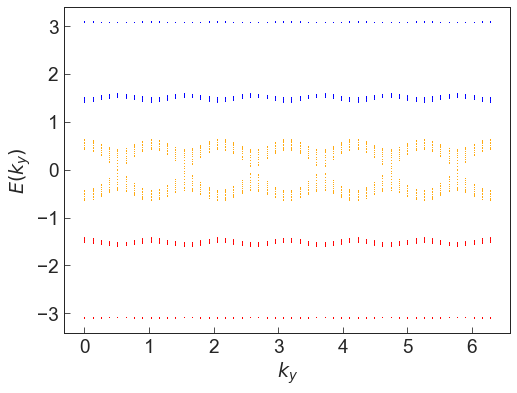

In [199]:
p=1
q=6
Ky = np.linspace(0,2*np.pi,50)
Kx = np.linspace(-np.pi,np.pi,20)
for ky in Ky:
    for kx in Kx:
        E=np.linalg.eigvalsh(Hk(kx,ky,p,q))
        plt.scatter(ky, E[0], c='r',s=0.5)
        plt.scatter(ky, E[1], c='r',s=0.5)
        plt.scatter(ky, E[2], c='orange',s=0.5)                
        plt.scatter(ky, E[3], c='orange',s=0.5)
        plt.scatter(ky, E[4], c='b',s=0.5)                
        plt.scatter(ky, E[5], c='b',s=0.5)

plt.xlabel(r'$k_y$')
plt.ylabel(r'$E(k_y)$')

Text(0, 0.5, '$E(k_y)$')

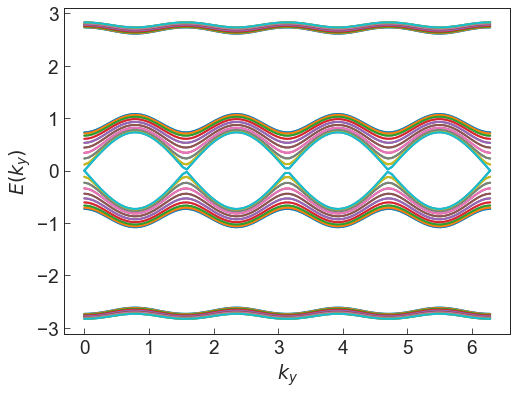

In [195]:
p=1
q=4
Ky = np.linspace(0,2*np.pi,100)
Kx = np.linspace(-np.pi/q,np.pi/q,20)
date = np.zeros((q,20,100))
for m,ky in enumerate(Ky):
    for n,kx in enumerate(Kx):
        for qq in range(q):
            date[qq][n][m] = np.linalg.eigvalsh(Hk(kx,ky,p,q))[qq]
for i in range(q):
    for j in range(20):
        plt.plot(Ky, date[i][j])
plt.xlabel(r'$k_y$')
plt.ylabel(r'$E(k_y)$')

Text(0, 0.5, '$E(k_y)$')

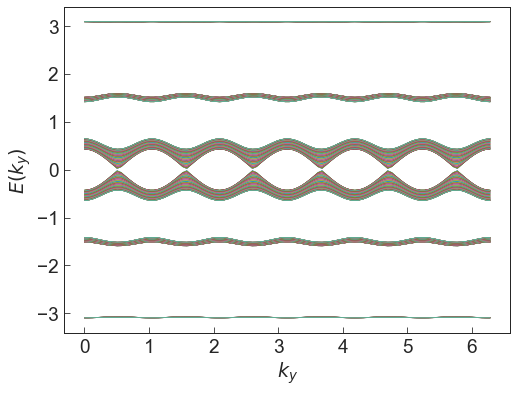

In [202]:
p=1
q=6
Ky = np.linspace(0,2*np.pi,100)
Kx = np.linspace(-np.pi/q,np.pi/q,100)
date = np.zeros((q,100,100))
for m,ky in enumerate(Ky):
    for n,kx in enumerate(Kx):
        for qq in range(q):
            date[qq][n][m] = np.linalg.eigvalsh(Hk(kx,ky,p,q))[qq]
for i in range(q):
    for j in range(100):
        plt.plot(Ky, date[i][j],lw=0.5)
plt.xlabel(r'$k_y$')
plt.ylabel(r'$E(k_y)$')

Edge state. When we consider a cylinder geometry and only ky as a good quantum number while false for kx, we should be able to observe the edge state coupling different band. Similarly, we write down the Happer equation for eignenenrgy in this condition:

$-t\left(\psi_{m+1}\left(k_{y}\right)+\psi_{m-1}\left(k_{y}\right)\right)-2 t \cos \left(k_{y}-2 \pi \alpha m\right) \psi_{m}\left(k_{y}\right)=E \psi_{m}\left(k_{y}\right)$

With the boundary condition $\psi_{0}=\psi_{N+1}=0$ as the open boundary.

In [382]:
def Edge(ky, N, a, t=1):
    # compare with the spectrum calculate on a torse, we further do the calculation on a cylinder geometry. So N instead of kx
    H = np.zeros((N,N),dtype=complex)
    H += -t*np.diag(np.ones(N-1),1)
    H += -2*t*np.diag(np.cos(ky - 2*np.pi*a*np.linspace(0,N-1,N)))
    H += -t*np.diag(np.ones(N-1),-1)
    return H

Text(0, 0.5, '$E(k_y)$')

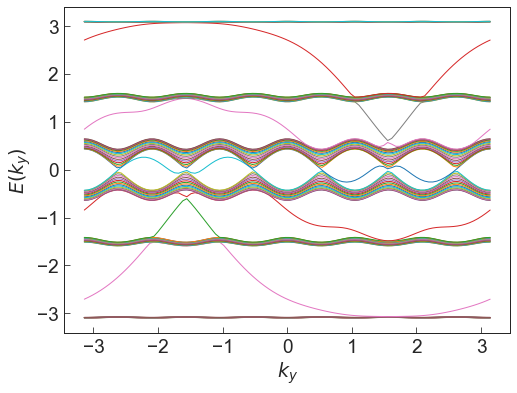

In [124]:
p = 1
q = 6
a = p/q
N = 100
Ky = np.linspace(-np.pi,np.pi,100)
result = np.zeros((100,N))
for i,ky in enumerate(Ky):
    result[i] = np.linalg.eigvalsh(Edge(ky, N, a))
for i in range(N):
    plt.plot(Ky, result.T[i],lw=1)    
plt.xlabel(r'$k_y$')
plt.ylabel(r'$E(k_y)$')

Given a fixed $k_y$ and see the edge state:

(0.0, 99.0)

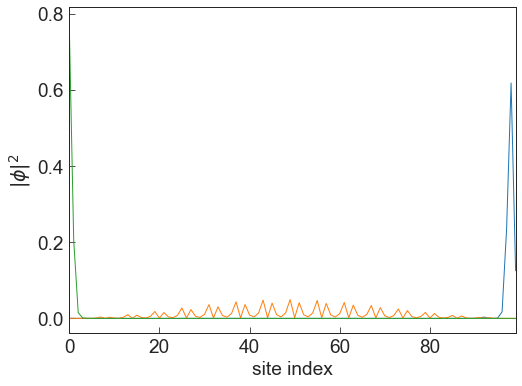

In [395]:
plt.figure(figsize=(8,6))
ky = 2
w, v = np.linalg.eigh(Edge(ky, N, a))
plt.plot(range(N), abs(v[0:, 16])**2, lw=1)
plt.plot(range(N), abs(v[0:, 17])**2, lw=1)
plt.plot(range(N), abs(np.linalg.eigh(Edge(-0.5, N, a))[1][0:, 16])**2, lw=1)
plt.xlabel('site index')
plt.ylabel(r'$|\phi|^2$')
plt.xlim(0,N-1)

Calclate Chern number of each band with the TKNN formula

$\sigma_{x y}=\frac{i e^{2}}{\hbar} \sum_{E_{\alpha}<E_{F}<E_{\beta}} \int_{\mathrm{T}^{2}} \frac{d^{2} k}{(2 \pi)^{2}} \frac{\left\langle u_{\mathbf{k}}^{\alpha}\left|\partial_{y} \tilde{H}\right| u_{\mathbf{k}}^{\beta}\right\rangle\left\langle u_{\mathbf{k}}^{\beta}\left|\partial_{x} \tilde{H}\right| u_{\mathbf{k}}^{\alpha}\right\rangle-\left\langle u_{\mathbf{k}}^{\alpha}\left|\partial_{x} \tilde{H}\right| u_{\mathbf{k}}^{\beta}\right\rangle\left\langle u_{\mathbf{k}}^{\beta}\left|\partial_{y} \tilde{H}\right| u_{\mathbf{k}}^{\alpha}\right\rangle}{\left(E_{\beta}(\mathbf{k})-E_{\alpha}(\mathbf{k})\right)^{2}}$

In [369]:
def Hk(kx,ky,q,t=1):
    # based on the knowledge we get above, the Hamiltion in k-space will be divided into q band and we can write the q*q matrice,
    # the input kx in [-pi/q,pi/q] while ky in [-pi,pi] and p, q as integer
    H = np.zeros((q,q),dtype=complex)
    # hopping along y direction
    H += -2*np.diag(np.cos(ky+2*np.pi*np.linspace(0,1,q,endpoint=False)))*t
    # hopping inside the magnetic lattice
    H += -np.diag(np.ones(q-1),1)*t - np.diag(np.ones(q-1),-1)*t
    # hopping between the magnetic lattice
    H[0][q-1] = -np.exp(1j*kx*q)*t
    H[q-1][0] = -np.exp(-1j*kx*q)*t
    return H
def Hkx(kx,ky,q,t=1):
    # caculate the kx deviation of H(kx, ky)
    H = np.zeros((q,q),dtype=complex)
    H[0][q-1] = -1j*q*np.exp(1j*kx*q)*t
    H[q-1][0] = 1j*q*np.exp(-1j*kx*q)*t
    return H

def Hky(kx,ky,q,t=1):
    # caculate the ky deviation of H(kx, ky)
    H = np.zeros((q,q),dtype=complex)
    H += 2*np.diag(np.sin(ky+2*np.pi*np.linspace(0,1,q,endpoint=False)))*t
    return H

In [406]:
def TKNN(p,q):
    # H is the function of (kx,ky) to give the Hamiltonian. 
    # Hkx is the kx derivative of H and Hky is the ky derivative of H
    # N denotes the number of band. xv,yv define the boundary of the Brioullion zone
    # Nx, Ny is the meshes for Chern number calculation
    Nx = 200
    Ny = 200
    Kx = np.linspace(-np.pi/q,np.pi/q,Nx)
    dkx = 2*np.pi/(Nx-1)
    Ky = np.linspace(-np.pi,np.pi,Ny)
    dky = 2*np.pi/(Ny-1)
    C = np.zeros(q)
    for m, kx in enumerate(Kx):
        for n, ky in enumerate(Ky):
            w, v = np.linalg.eigh(Hk(kx,ky,q))
            Okx = Hkx(kx,ky,q)
            Oky = Hky(kx,ky,q)
            for i in range(q):
                for j in range(q):
                    if i != j:
                        keti = v[0:, i]
                        ketj = v[0:, j]
                        Ei = w[i]
                        Ej = w[j]
                        a1 = np.conj(keti.T).dot(Okx.dot(ketj))
                        a2 = np.conj(ketj.T).dot(Oky.dot(keti))
                        a3 = np.conj(keti.T).dot(Oky.dot(ketj))
                        a4 = np.conj(ketj.T).dot(Okx.dot(keti))
                        C[j] += -np.imag(a1*a2-a3*a4)/(Ei-Ej)**2
    return C/2/np.pi*dkx*dky/q

In [407]:
p = 1
q = 3
t = 1
C =  TKNN(p,q)
for i in range(q):
    print('The %i-th Chern Number is: ' %(i), C[i])

The 0-th Chern Number is:  1.0144103823423667
The 1-th Chern Number is:  -2.018363728135676
The 2-th Chern Number is:  1.003953345793314


# 1D with diagnol hopping

# 2D magnetic quantum walk

$\hat{W}=\hat{F} \hat{S}_{y} \hat{C} \hat{S}_{x} \hat{C}$, where $F=e^{i\Phi\hat{x}\sigma_z}$

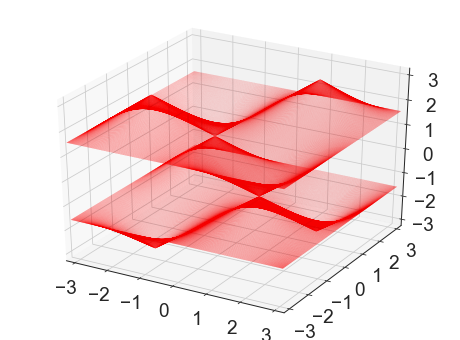

In [47]:
kx = np.linspace(-np.pi,np.pi,500)
ky = np.linspace(-np.pi,np.pi,500)
x,y = np.meshgrid(kx,ky)
from mpl_toolkits.mplot3d import Axes3D
def E(kx, ky):
    return np.arccos(-np.sin(kx)*np.sin(ky))
z = E(x,y)
fig = plt.figure()  #定义新的三维坐标轴
ax = plt.axes(projection='3d')
# ax.plot_surface(x,y,z,cmap='rainbow') 
ax.set_xlim(-np.pi,np.pi)
ax.set_ylim(-np.pi,np.pi)
ax.set_zlim(-np.pi,np.pi)
ax.scatter3D(x,y,z, c='r',s=0.01)
ax.scatter3D(x,y,-z, c='r',s=0.01)

In [159]:
def Unitary(kx, ky, n):
    U1 = np.kron(np.eye(n),C)
    Upx = np.diag(np.ones(n-1,dtype=complex),1)
    Upx[n-1][0] = np.exp(-1j*n*kx)
    Umx = np.diag(np.ones(n-1,dtype=complex),-1)
    Umx[0][n-1] = np.exp(+1j*n*kx)
    Upy = np.diag(np.exp(1j*(2*np.pi*np.arange(n)/n-ky)))
    Umy = np.diag(np.exp(-1j*(2*np.pi*np.arange(n)/n-ky)))
    U2 = np.kron(Upx, p) + np.kron(Umx, m)
    U3 = np.kron(Upy, p) + np.kron(Umy, m)
    return np.dot(np.dot(U3, U1), np.dot(U2, U1))
def H(kx, ky,n):
    E = np.linalg.eig(Unitary(kx, ky, n))[0]
    return np.sort(np.real(1j*np.log(E)))


In [161]:
data=np.zeros((2*n,200,200))
data.T[0]

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [167]:
n = 3
kx = np.linspace(-np.pi/n, np.pi/n, 200)
ky = np.linspace(-np.pi, np.pi, 200)
data = np.zeros((2*n,200,200))
for i,kkx in enumerate(kx):
    for j,kky in enumerate(ky):
        for q in range(2*n):
            data[q][i][j] = H(kkx,kky,n)[q]

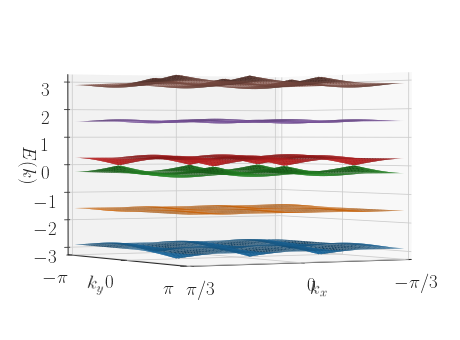

In [191]:
fig = plt.figure()  #定义新的三维坐标轴
ax = plt.axes(projection='3d')
ax.view_init(1, 60)
x,y = np.meshgrid(kx,ky)
# ax.plot_surface(x,y,z,cmap='rainbow') 
ax.set_xlim(-np.pi/n,np.pi/n)
ax.set_ylim(-np.pi,np.pi)
ax.set_zlim(-np.pi,np.pi)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$E(k)$')
plt.xticks([-np.pi/n,0,np.pi/n],(r'$-\pi/3$',r'$0$',r'$\pi/3$'))
plt.yticks([-np.pi,0,np.pi],(r'$-\pi$',r'$0$',r'$\pi$'))
for i in range(2*n):
    ax.plot_surface(x,y,data[i])

In [152]:
data[i]

array([[2.8889124 , 2.8889124 , 2.8889124 , ..., 2.8889124 , 2.8889124 ,
        2.8889124 ],
       [2.8889124 , 2.88931074, 2.88970919, ..., 2.88811757, 2.88851454,
        2.8889124 ],
       [2.8889124 , 2.88970601, 2.89050078, ..., 2.88733179, 2.88812074,
        2.8889124 ],
       ...,
       [2.8889124 , 2.88812074, 2.88733179, ..., 2.89050078, 2.88970601,
        2.8889124 ],
       [2.8889124 , 2.88851454, 2.88811757, ..., 2.88970919, 2.88931074,
        2.8889124 ],
       [2.8889124 , 2.8889124 , 2.8889124 , ..., 2.8889124 , 2.8889124 ,
        2.8889124 ]])

# 1D magnetic quantum walk

$\hat{W}=\hat{F} \hat{S}\hat{C}$, where $F=e^{i\Phi\hat{x}}$

In [337]:
p = np.array([[1,0],[0,0]])
m = np.array([[0,0],[0,1]])
pm = np.array([[0,1],[0,0]])
mp = np.array([[0,0],[1,0]])
C = 1/np.sqrt(2)*np.array([[1,-1],[1,1]])
def Unitary(k, n):
    U1 = np.kron(np.eye(n),C)
    Up = np.diag(np.exp(1j*2*np.pi*np.arange(n-1)/n),1)
    Up[n-1][0] = np.exp(1j*(-n*k+2*np.pi/n*(n-1)))
    Um = np.diag(np.exp(1j*2*np.pi*np.arange(n-1)/n),-1)
    Um[0][n-1] = np.exp(1j*(n*k+2*np.pi/n*(n-1)))
    U2 = np.kron(Up, p) + np.kron(Um, m)
    return np.dot(U1, U2)
    

In [135]:
def H(k, n):
    E = np.linalg.eig(Unitary(k,n))[0]
    return np.sort(np.real(1j*np.log(E)))
H(1.5,2)

array([-2.3536926 , -0.78790005,  0.78790005,  2.3536926 ])

([<matplotlib.axis.XTick at 0x1fb006bd9d0>,
 [Text(0, 0, '$-\\pi/3$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi/3$')])

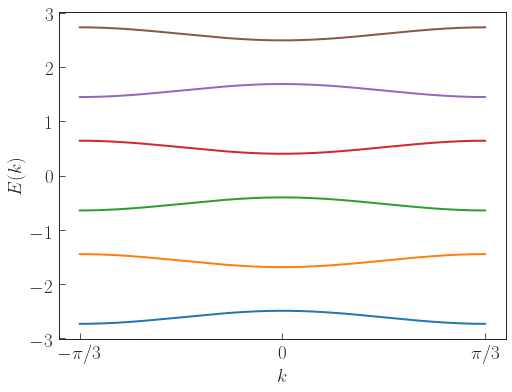

In [136]:
n = 3
k = np.linspace(-np.pi/n, np.pi/n, 1000)
data = np.zeros((2*n,1000))
for i,kk in enumerate(k):
    data.T[i] = H(kk, n)
for i in range(2*n):
    plt.plot(k, data[i])
plt.xlabel(r'$k$')
plt.ylabel(r'$E(k)$')
plt.xticks([-np.pi/n,0,np.pi/n],(r'$-\pi/3$',r'$0$',r'$\pi/3$'))

# The real space spectrum in this condition

In [340]:
def Unitary_real(alpha,N):
    U1 = np.kron(C,np.eye(N))
    u2p = np.diag(np.exp(1j*2*np.pi*alpha*np.arange(N-1)),1)
    u2p[N-1][0] = np.exp(1j*2*np.pi*alpha*(N-1))
    u2m = np.diag(np.exp(1j*2*np.pi*alpha*np.arange(N-1)),-1)
    u2m[0][N-1] = np.exp(1j*2*np.pi*alpha*(N-1))
    U2 = np.kron(p, u2p) + np.kron(m, u2m)
    return np.dot(U2, U1)
def H_real(alpha, N):
    E = np.linalg.eig(Unitary_real(alpha, N))[0]
    return np.sort(np.real(1j*np.log(E)))
H_real(1.7,3)

array([-2.71883553, -1.81052369, -0.70275043,  0.2055614 ,  1.59715727,
        2.17275391])

([<matplotlib.axis.YTick at 0x1fb3e4bf670>,
 [Text(0, 0, '$-\\pi$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi$')])

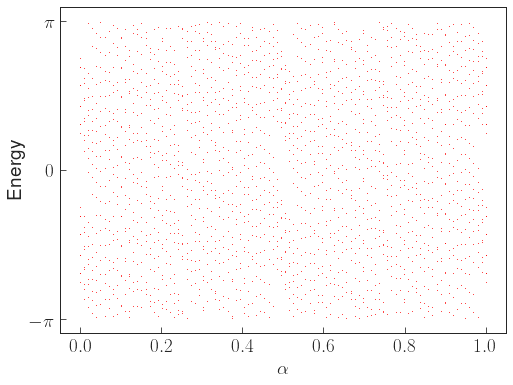

In [341]:
alpha = np.linspace(0,1,100)
N=10
for a in alpha:
    E=H_real(a,N)
    for e in E:
        plt.scatter(a,e,c='r',s=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Energy')
plt.yticks([-np.pi,0,np.pi],(r'$-\pi$',r'$0$',r'$\pi$'))

In [358]:
p = np.array([[1,0],[0,0]])
m = np.array([[0,0],[0,1]])
pm = np.array([[0,1],[0,0]])
mp = np.array([[0,0],[1,0]])

def Unitary_real(alpha,N, theta, delta):
    U1 = np.kron(C,np.eye(N))
    U2 = np.kron(np.eye(2),np.diag(np.exp(1j*2*np.pi*alpha*np.arange(N)),0))
    
    u3p = np.diag(np.ones(N)*np.cos(delta),0) 
    u3m = np.diag(np.ones(N)*np.cos(delta),0)
    u3pm = np.diag(np.ones(N-1)*np.sin(delta)*1j*np.exp(1j*theta),1)
    u3pm[N-1][0] = np.sin(delta)*1j*np.exp(1j*theta)
    u3mp = np.diag(np.ones(N-1)*np.sin(delta)*1j*np.exp(-1j*theta),-1)
    u3mp[0][N-1] = np.sin(delta)*1j*np.exp(-1j*theta)
    U3 = np.kron(p,u3p) + np.kron(m,u3m) + np.kron(mp,u3pm) + np.kron(pm,u3mp)
    return np.dot(U2, np.dot(U3, U1))
def H_real(alpha, N, theta, delta):
    E = np.linalg.eig(Unitary_real(alpha, N, theta, delta))[0]
    return np.sort(np.real(1j*np.log(E)))
H_real(1.7,3,0,0)

array([-1.72787596, -0.78539816,  0.78539816,  1.09955743,  2.67035376,
        2.98451302])

([<matplotlib.axis.YTick at 0x1fb5fc05280>,
 [Text(0, 0, '$-\\pi$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi$')])

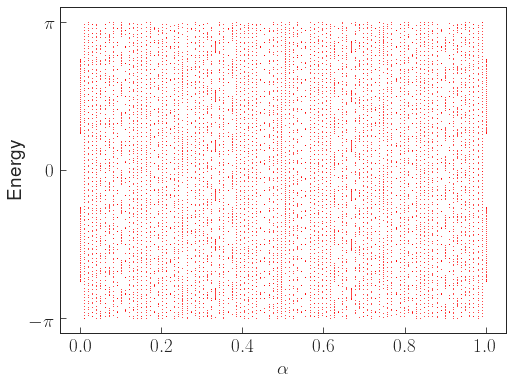

In [359]:
alpha = np.linspace(0,1,100)
N=50
for a in alpha:
    E=H_real(a,N,np.pi/4,np.pi/2)
    for e in E:
        plt.scatter(a,e,c='r',s=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Energy')
plt.yticks([-np.pi,0,np.pi],(r'$-\pi$',r'$0$',r'$\pi$'))

In [364]:
p = np.array([[1,0],[0,0]])
m = np.array([[0,0],[0,1]])
pm = np.array([[0,1],[0,0]])
mp = np.array([[0,0],[1,0]])


def Unitary_real(alpha,N,theta):
    U = np.zeros((2*N,2*N),dtype=complex)
    U += np.kron(pm+mp,np.diag(np.exp(1j*2*np.pi*alpha*np.arange(N)),0))

    up = np.diag(np.ones(N-1)*np.exp(1j*theta),1)
    um = np.diag(np.ones(N-1)*np.exp(-1j*theta),-1)
    up[N-1][0] = np.exp(1j*theta)
    um[0][N-1] = np.exp(-1j*theta)
    U += np.kron(p,up) + np.kron(m,um) 
    
    upm = np.diag(np.ones(N-1),1)
    upm[N-1][0] =1
    ump = np.diag(np.ones(N-1),-1)
    ump[0][N-1] =1
    U += np.kron(pm,upm) + np.kron(mp,ump)
    
    return U
def H_real(alpha, N, theta):
    E = np.linalg.eig(Unitary_real(alpha, N, theta))[0]
    return np.sort(np.real(1j*np.log(E)))

([<matplotlib.axis.YTick at 0x1fb6e3dc3d0>,
 [Text(0, 0, '$-\\pi$'), Text(0, 0, '$0$'), Text(0, 0, '$\\pi$')])

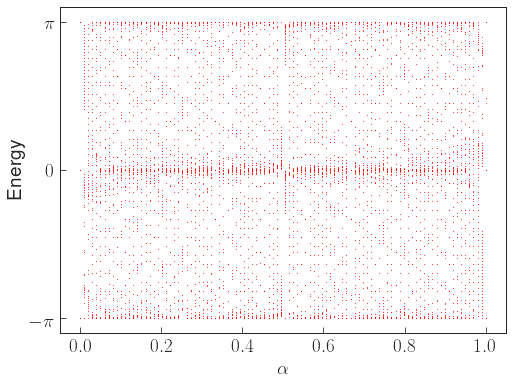

In [367]:
alpha = np.linspace(0,1,100)
N=30
for a in alpha:
    E=H_real(a,N,0)
    for e in E:
        plt.scatter(a,e,c='r',s=0.5)
plt.xlabel(r'$\alpha$')
plt.ylabel('Energy')
plt.yticks([-np.pi,0,np.pi],(r'$-\pi$',r'$0$',r'$\pi$'))

In [392]:
def H(k, q, theta):
    a = np.array([[np.exp(1j*theta),1],[0,np.exp(1j*theta)]])
    h1 = np.kron(a,np.exp(1j*k)*np.diag(np.exp(1j*2*np.pi/q*np.arange(q))))
    hh = np.diag(np.ones(q-1),-1)
    hh[0][q-1] = 1
    h2 = np.kron(m,hh)
    h =  h1+ h2 + (h1+h2).T.conjugate()

    E = np.linalg.eig(h)[0]
    return h

H(1,3,0)

array([[ 1.08060461+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.54030231+0.84147098j,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -1.9977728 +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
        -0.9988864 +0.04718003j,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.91716819+0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.4585841 -0.88865102j],
       [ 0.54030231-0.84147098j,  0.        +0.j        ,
         0.        +0.j        ,  1.08060461+0.j        ,
         1.        +0.j        ,  1.        +0.j        ],
       [ 0.        +0.j        , -0.9988864 -0.04718003j,
         0.        +0.j        ,  1.        +0.j        ,
        -1.9977728 +0.j        ,  1.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.4585841 +0.88865102j,  1.        +0.j        ,
         

Text(0, 0.5, 'Energy')

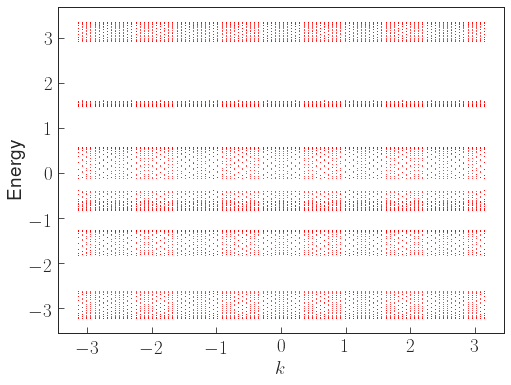

In [385]:
q = 3
t = np.linspace(-np.pi,np.pi,100)
k = np.linspace(-np.pi,np.pi,20)
for kk in k:
    for tt in t:
        E=H(kk,q,tt)
        for e in E:
            plt.scatter(tt,e,c='r',s=0.5)
plt.xlabel(r'$k$')
plt.ylabel('Energy')
# plt.yticks([-np.pi,0,np.pi],(r'$-\pi$',r'$0$',r'$\pi$'))